## Five Link Solver

This notebok solves and graphs the kinematics of a five link suspension

In [1]:
from suspension_kinematics.independent_suspension import Five_Link
from suspension_kinematics.components import Single_Link
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rc
from vpython import rate
import vpython

#Shoutout to Dr. Chrisy Xiyu who I stole this format from
plt.rcParams['xtick.labelsize']=20      # change the tick label size for x axis
plt.rcParams['ytick.labelsize']=20      # change the tick label size for x axis
plt.rcParams['axes.linewidth']=3        # change the line width of the axis
plt.rcParams['xtick.major.width'] = 3   # change the tick line width of x axis
plt.rcParams['ytick.major.width'] = 3   # change the tick line width of y axis 
rc('text', usetex=False)                # disable LaTeX rendering in plots
rc('font',**{'family':'DejaVu Sans'})   # set the font of the plot to be DejaVu Sans

<IPython.core.display.Javascript object>

# Configure Geometry

In [2]:
link_lengths = np.array([5,5,5,5,5.5])
frame_pickups = np.array([[1,0,1],
                          [-1,0,1],
                          [-1,0,-1],
                          [1,0,-1],
                          [0.5,0,0]])
upright_pickups = np.array([[0.9,0,0.9],
                          [-0.9,0,0.9],
                          [-0.9,0,-0.9],
                          [0.9,0,-0.9],
                          [1.5,0,0]])


fl = Five_Link(frame_pickups, link_lengths, upright_pickups)

count 0
count 1
count 2
count 3
count 4


Here are functions used to configure the driving variable and creat the table of solutions 

In [3]:
#solves suspension kinematics system of equations in terms of z
def solve_z(z, guess, model):
    driving_var = 2
    
    def function(vars):
        return model.full_sys_of_eq(vars, driving_var, z)
    
    def jacobian(vars):
        return model.jacobian(vars, driving_var)

    
    return sp.optimize.fsolve(function, guess, fprime=jacobian) 

#solves for a list of inputs, using each output as a guess for the next solution
def create_table(inputs, solver, system, inital_guess):
    
    outputs = np.zeros([len(inputs),len(inital_guess)])
    
    guess = inital_guess
    for i, input in enumerate(inputs):
            outputs[i] = solver(input, guess, system)
            guess = outputs[i]


    return outputs

This creates the table of solutionsusing an inital guess

In [4]:
x_0 = np.array([ 5, 0, -1, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
z_vals = np.linspace(1, -1, 500)
positions = create_table(z_vals, solve_z, fl, x_0)

Here is the graphing of the wheel position and orientation for various z posisions

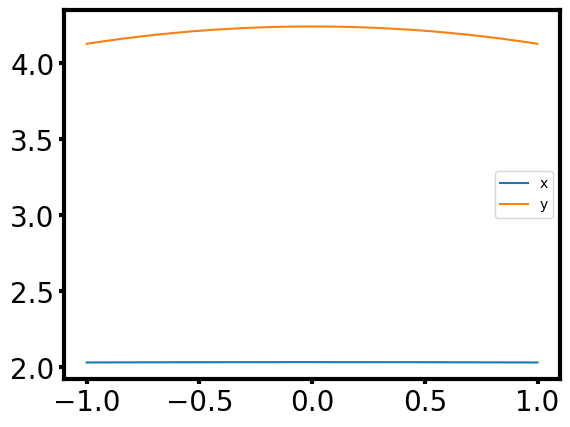

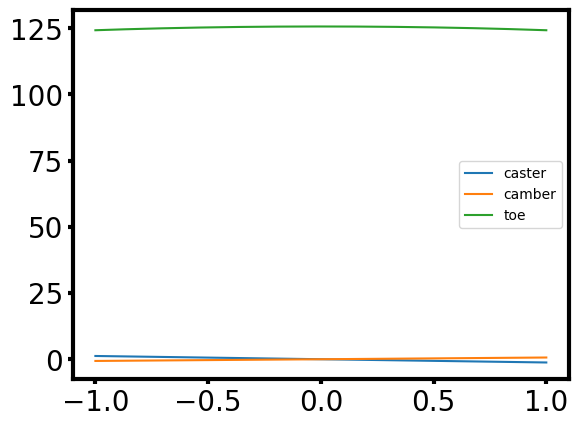

In [5]:
z = positions[:,2]

x = positions[:,0]
y = positions[:,1]
plt.plot(z, x)
plt.plot(z, y)
plt.legend(["x","y"])
plt.show()


caster = positions[:,3]
camber = positions[:,4]
toe = positions[:,5]
plt.plot(z, caster*180/np.pi)
plt.plot(z, camber*180/np.pi)
plt.plot(z, toe*180/np.pi)
plt.legend(["caster", "camber", "toe"])
plt.show()

Animation over the full range of outputs

In [ ]:
r = 50
loops = 10

vpython.arrow(axis=vpython.vector(0,0,1), color=vpython.color.blue)
vpython.arrow(axis=vpython.vector(-1,0,0), color=vpython.color.green)
vpython.arrow(axis=vpython.vector(0,-1,0), color=vpython.color.red)

for i in range(loops):
    for pos in positions:
        rate(r)
        fl.render(pos)
    for pos in reversed(positions):
        rate(r)
        fl.render(pos)
